In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import glob
import umap

In [15]:
files = glob.glob("letters2/*.png")
n_files = len(files)

letras = pd.read_csv("letters2.txt")

In [16]:
im = []
    
for i, f in enumerate(files): 
    ii = plt.imread(f)
    d= ii.flatten()
    im.append(d)

X = np.ones((len(im), len(im[0])))

for i,img in enumerate(im):
    if len(img)!=4096:
        print(files[i])

In [17]:
letras_num = letras['label']
letras_let = letras['letter']
letras_file = letras['file']

In [292]:
files_order = []
for i,ii in enumerate(files):    
    ii.split("/")
    files_order.append(ii[9:])  

In [293]:
letras_num_2 = np.zeros(len(letras_num))
letras_let_2 = ['']*(len(letras_let))

for j,jj in enumerate(files_order):
    index_ = files_order.index(letras_file[j])
    letras_num_2[index_]=letras_num[j]
    letras_let_2[index_]=letras_let[j]

# -----------------------------------------------------------------------------------

# n_neighbors=10, min_dist = 0.1, metric ='euclidean'

In [294]:
reducer = umap.UMAP(n_neighbors=10, min_dist = 0.1, metric ='euclidean')
reducer.fit(X)
embedding = reducer.transform(X)

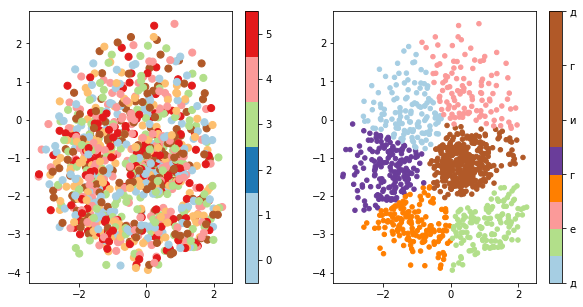

In [295]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.title("K-means clustering")
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))


# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.title("K-means clustering")
plt.colorbar(boundaries=np.arange(11)-0.5)


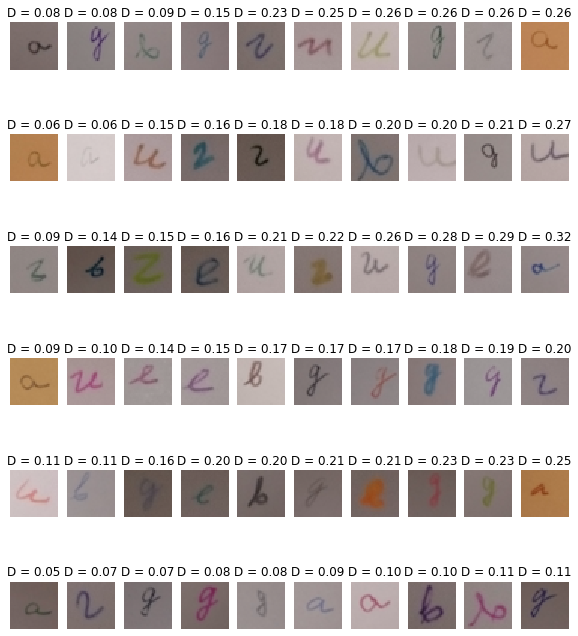

In [296]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

# ----------------------------------------------------------------------------

## n_neighbors=2, min_dist = 0.9, metric ='euclidean'

In [297]:
reducer = umap.UMAP(n_neighbors=2, min_dist = 0.9, metric ='euclidean')
reducer.fit(X)
embedding = reducer.transform(X)

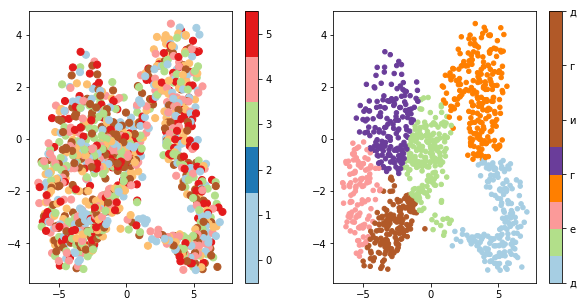

In [298]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))

# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)

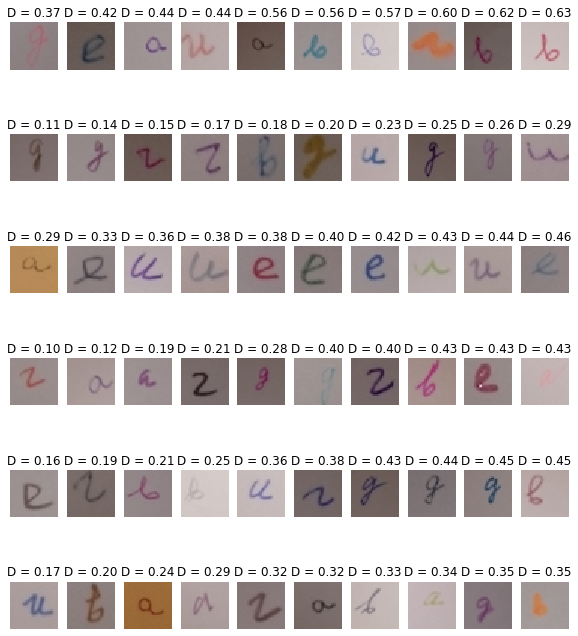

In [299]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

# ---------------------------------------------------------------------------

# n_neighbors=25, min_dist = 0.1, metric ='minkowski'

In [300]:
reducer = umap.UMAP(n_neighbors=25, min_dist = 0.1, metric ='minkowski')
reducer.fit(X)
embedding = reducer.transform(X)

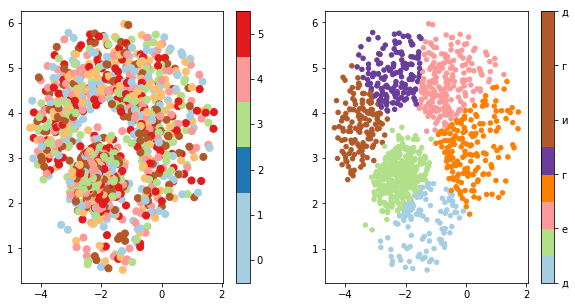

In [290]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))

# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)

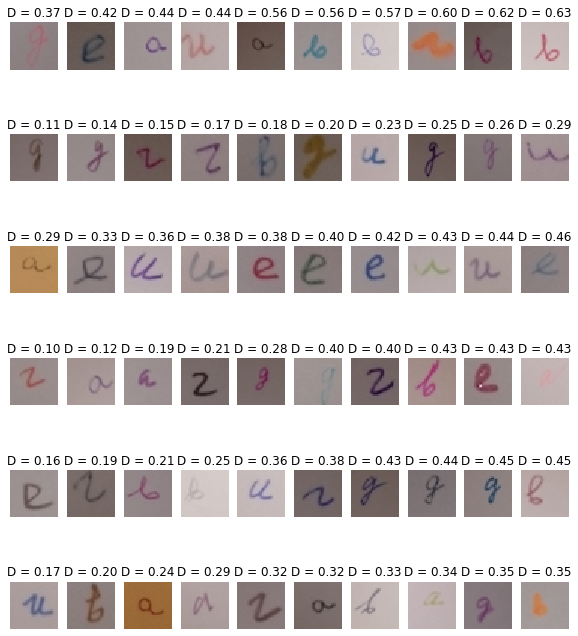

In [301]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

# ---------------------------------------------------------------------------

# n_neighbors=25, min_dist = 0.1, metric ='cosine'

In [304]:
reducer = umap.UMAP(n_neighbors=25, min_dist = 0.1, metric ='cosine')
reducer.fit(X)
embedding = reducer.transform(X)

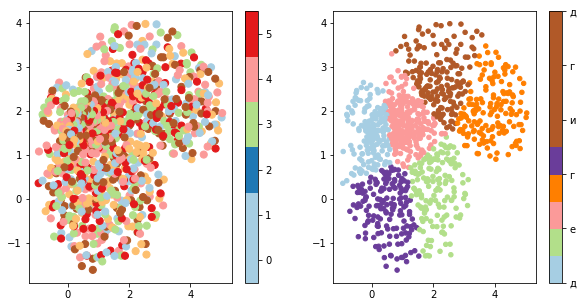

In [305]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))

# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)

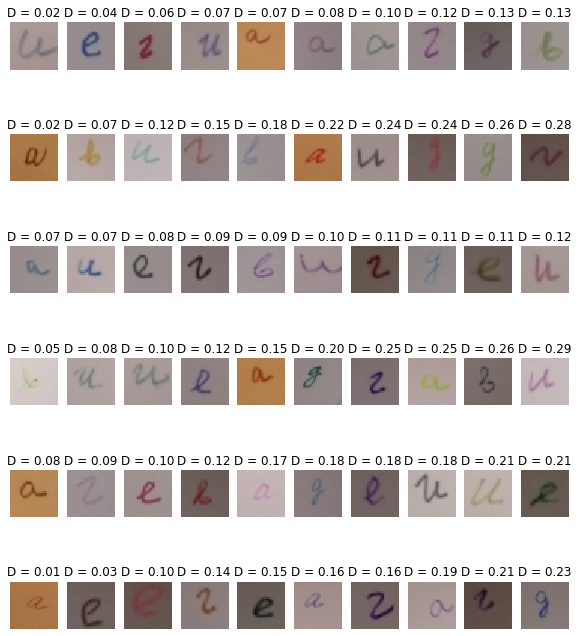

In [306]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

In [307]:
reducer = umap.UMAP(n_neighbors=25, min_dist = 0.1, metric ='euclidean')
reducer.fit(X)
embedding = reducer.transform(X)

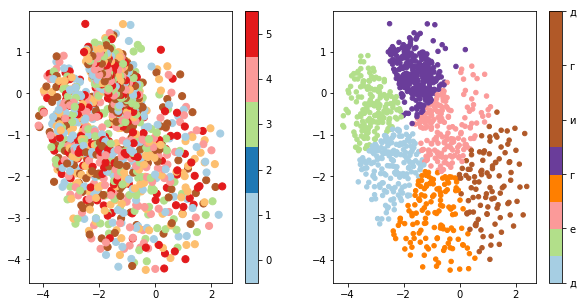

In [308]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))

# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)

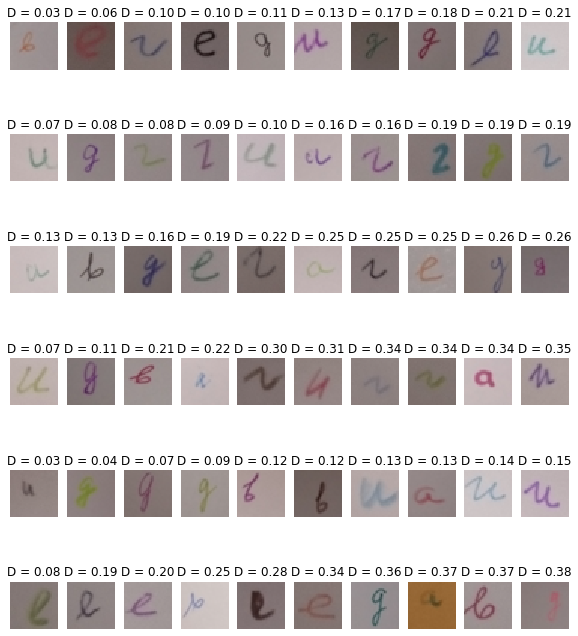

In [309]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

In [310]:
reducer = umap.UMAP(n_neighbors=25, min_dist = 0.9, metric ='minkowski')
reducer.fit(X)
embedding = reducer.transform(X)

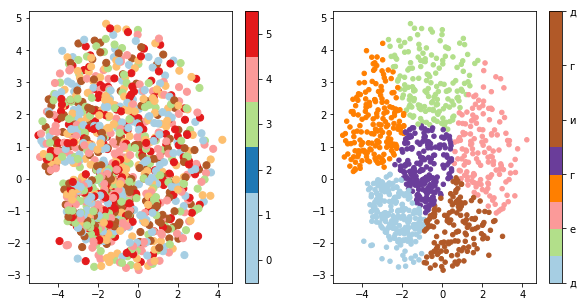

In [311]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))

# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)

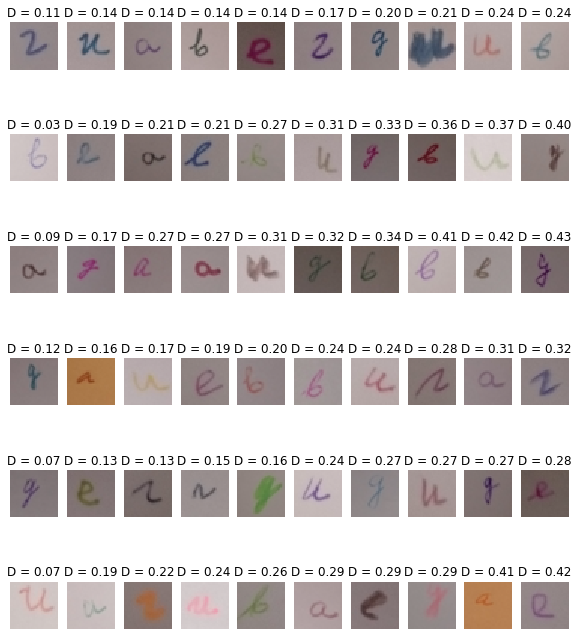

In [312]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

In [313]:
reducer = umap.UMAP(n_neighbors=50, min_dist = 0.1, metric ='minkowski')
reducer.fit(X)
embedding = reducer.transform(X)

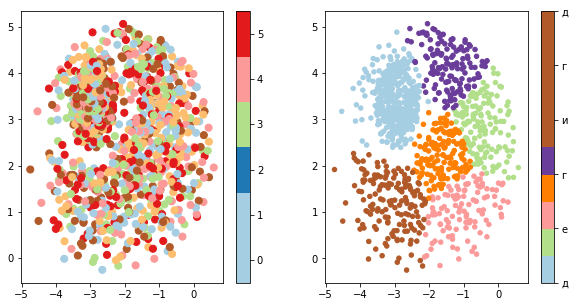

In [314]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(embedding[:,0], embedding[:,1], c=letras_num_2, cmap='Paired', s=50.0)
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))

# clusters sobre los resultados de tsne
n_clusters = 6
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
plt.subplot(1,2,2)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=20.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticklabels(letras_let_2)

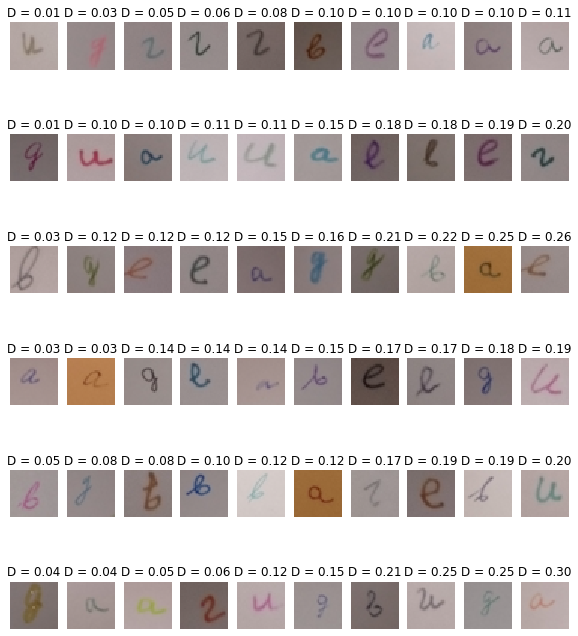

In [315]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(im[ind].reshape(32,32,4))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')

In [ ]:
Unknown metric red_channel_dist. Valid metrics are ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski', 'haversine'], or 'precomputed', or a callable
